In [1]:
### K-Vecinos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [5]:
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=1000)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1234)

In [6]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

## mikoski
$$||\vec{v}||_p=\sqrt[p]{\sum_{i=1}^n (v_i^p)}$$

In [7]:
vecinos=KNeighborsClassifier()

In [8]:
vecinos.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
vecinos.n_features_in_

20

In [11]:
y_pred=vecinos.predict(X_test)

In [12]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [13]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix

In [14]:
accuracy_score(y_test,y_pred)

0.91

In [15]:
recall_score(y_test,y_pred)

0.8838709677419355

In [16]:
precision_score(y_test,y_pred)

0.8838709677419355

$$\text{recall}=\cfrac{VP}{VP+FN}$$

In [17]:
f1_score(y_test,y_pred)

0.9102990033222592

In [19]:
pd.read_csv("./datos_peliculas.csv").isnull().sum()

pelicula                0
año                     0
ratings                 0
genero                  0
ventas                  0
presupuesto             0
secuela                 0
vistas_youtube          0
positivos_youtube       0
negativos_youtube       0
comentarios             0
seguidores_agregados    0
dtype: int64

* Grupo 1 rating
* Grupo 2 Ventas
* Grupo 3 visitas positivas youtube
* Grupo 4 Comentarios

In [22]:
df=pd.read_csv("./datos_peliculas.csv")


35

#### Varibale objetivo Rating
como mencionaba Roger, hay valores en seguidores agregados que vamos a imputar ya que están a cero.
Para ello como es de regresión el problema vamos a imputar esos valores utilizando el modelo de regresión lineal (así utilizamos otro modelo)

Eliminaremos la variable objetivo.

In [53]:
Train=df[df["seguidores_agregados"]>0].drop(columns=["pelicula","ratings"])
Test=df[df["seguidores_agregados"]==0].drop(columns=["pelicula","ratings","seguidores_agregados"])

In [54]:
from sklearn.linear_model import LinearRegression 

In [55]:
lr=LinearRegression(fit_intercept=False)

In [56]:
lr.fit(Train.drop(columns="seguidores_agregados"),Train["seguidores_agregados"])

LinearRegression(fit_intercept=False)

In [57]:
y_pred=lr.predict(Test)

In [58]:
Test["seguidores_agregados"]=y_pred

In [59]:
Tablon=pd.concat([Train,Test],axis=0)

In [60]:
len(df)

231

In [61]:
len(Train)

196

In [62]:
Tablon

,año,genero,ventas,presupuesto,secuela,vistas_youtube,positivos_youtube,negativos_youtube,comentarios,seguidores_agregados
0,2014,8,9130,4000000.0,1,3280543,4632,425,636,1.120000e+06
1,2014,1,192000000,50000000.0,2,583289,3465,61,186,1.235000e+07
2,2014,1,30700000,28000000.0,1,304861,328,34,47,4.830000e+05
3,2014,1,106000000,110000000.0,2,452917,2429,132,590,5.680000e+05
4,2014,8,17300000,3500000.0,2,3145573,12163,610,1082,1.923800e+06
...,...,...,...,...,...,...,...,...,...,...
226,2015,4,1210000,50000000.0,1,3701061,9325,641,1859,1.413650e+06
227,2015,15,21000000,37000000.0,1,7119456,18803,1128,2290,3.562333e+06
228,2015,8,10200000,35000000.0,1,3450614,6823,325,409,2.417700e+06
229,2015,1,12300000,3000000.0,1,66872,400,67,201,1.211966e+06


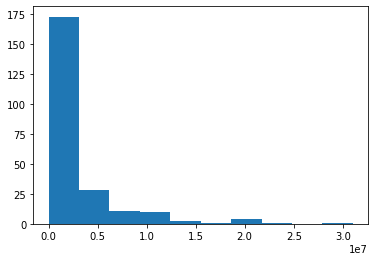

In [64]:
plt.hist(Tablon["seguidores_agregados"]);

In [68]:
Tablon_Final=pd.merge(Tablon,df["ratings"],left_index=True,right_index=True)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(Tablon_Final.drop(columns="ratings"),Tablon_Final["ratings"],train_size=0.7,random_state=1234)


In [72]:
from sklearn.metrics import mean_squared_error

In [81]:
resultado=pd.DataFrame()
for i in range(1,15):
    vecinos=KNeighborsRegressor(n_neighbors=i)
    vecinos.fit(X_train,y_train)
    y_pred=vecinos.predict(X_test)
    resultado.loc[str(i),"Error"]=mean_squared_error(y_test,y_pred)



In [84]:
resultado.sort_values(by="Error")

,Error
11,0.896982
10,0.900749
12,0.912364
9,0.918203
8,0.927632
13,0.929066
6,0.937893
7,0.938554
14,0.940816
4,1.024473
